In [17]:
import xarray as xr
import warnings
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
warnings.filterwarnings("ignore")


In [3]:
ifile = "/media/cap/extra_work/verification/oper-harp-verif/ACCORD_VS_202507/sample_data/CLAEF1k/20250712/00/CLAEF00+0012:00.grb2"

df=xr.open_dataset(ifile,engine="cfgrib") #3 hour accumu for forecast starting at 09 UTC


In [4]:
df

<xarray.Dataset> Size: 5MB
Dimensions:     (latitude: 945, longitude: 1300)
Coordinates:
    number      int64 8B ...
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
  * latitude    (latitude) float64 8kB 51.5 51.49 51.48 ... 43.02 43.01 43.0
  * longitude   (longitude) float64 10kB 5.032 5.045 5.059 ... 22.54 22.55 22.57
    valid_time  datetime64[ns] 8B ...
Data variables:
    tp          (latitude, longitude) float32 5MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2025-07-21T11:47 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
# Find the maximum value and its location
tp = df["tp"]
lats = df['latitude']
lons = df['longitude']
max_value = tp.max().values
max_idx = np.unravel_index(tp.argmax(), tp.shape)
max_lat = lats.values[max_idx[0]]
max_lon = lons.values[max_idx[1]]

# Add an X marker at the maximum value location
max_value

array(38.38867, dtype=float32)

In [8]:
max_lon

np.float64(20.7592000000004)

In [9]:
max_lat

np.float64(48.266999999999875)

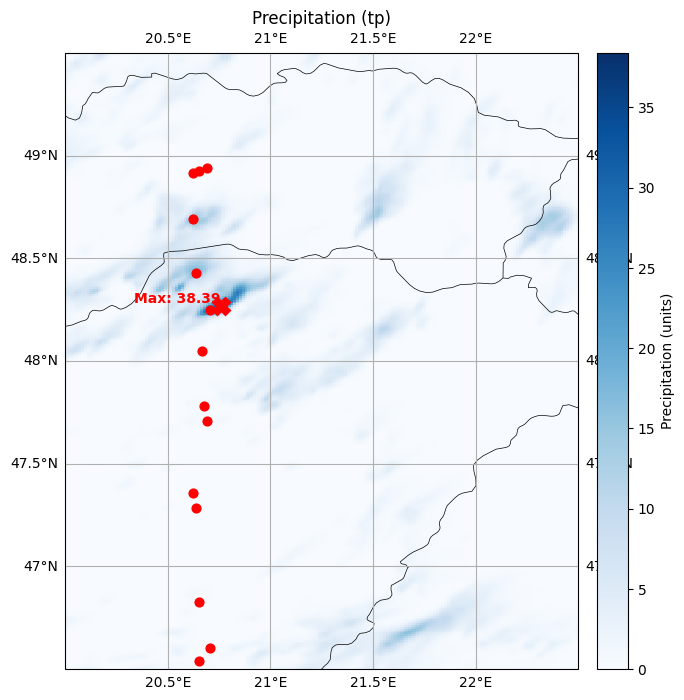

In [21]:

# Your dataset and variable
# df: xarray.Dataset
# tp: xarray.DataArray with dims (y, x)
tp = df['tp']
lats = df['latitude']
lons = df['longitude']

# Create a PlateCarree projection for the map (standard lat/lon)
pc = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': pc})

# Plot using pcolormesh with 2D lat/lon coordinates
# Specify transform=pc because lats/lons are in PlateCarree (regular lat/lon)
im = ax.pcolormesh(
    lons, lats, tp,
    transform=pc,
    cmap='Blues',
    shading='auto'
)

# Add coastlines and gridlines
ax.coastlines()

import cartopy.feature as cfeature

# After adding coastlines but before adding the X marker:
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='black')
ax.gridlines(draw_labels=True)

# Add an X marker at the maximum value location
ax.plot(max_lon, max_lat, 'Xr', markersize=12, markeredgewidth=2, transform=pc)

# Add a text annotation with the maximum value
ax.text(max_lon, max_lat, f'Max: {max_value:.2f}', color='red',
        fontweight='bold', transform=pc,
        horizontalalignment='right', verticalalignment='bottom')
# Set the extent to zoom in on a specific region
# Format: [lon_min, lon_max, lat_min, lat_max]
lon_min = 20
lon_max = 22.5
lat_min = 46.5
lat_max = 49.5
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=pc)
# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, label='Precipitation (units)')


# Read and plot coordinates
#these points were detected by the max algorithm
coords = pd.read_csv('small_sample_max_austria.csv')
ax.scatter(
    coords['lon'], coords['lat'],
    color='red', s=40, marker='o',
    transform=pc,
    label='Coordinates'
)



plt.title('Precipitation (tp)')
plt.show()